In [ ]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FER train.zip to FER train.zip


In [ ]:
!unzip '/content/FER train.zip' -d /content/dataset/

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/face emotion train/sad/30743.jpg  
  inflating: /content/dataset/face emotion train/sad/30750.jpg  
  inflating: /content/dataset/face emotion train/sad/30752.jpg  
  inflating: /content/dataset/face emotion train/sad/30757.jpg  
  inflating: /content/dataset/face emotion train/sad/30764.jpg  
  inflating: /content/dataset/face emotion train/sad/30767.jpg  
  inflating: /content/dataset/face emotion train/sad/30776.jpg  
  inflating: /content/dataset/face emotion train/sad/3078.jpg  
  inflating: /content/dataset/face emotion train/sad/30784.jpg  
  inflating: /content/dataset/face emotion train/sad/30785.jpg  
  inflating: /content/dataset/face emotion train/sad/30791.jpg  
  inflating: /content/dataset/face emotion train/sad/30800.jpg  
  inflating: /content/dataset/face emotion train/sad/30810.jpg  
  inflating: /content/dataset/face emotion train/sad/30816.jpg  
  inflating: /content/dataset/face emoti

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FER validation.zip to FER validation.zip


In [ ]:
!unzip '/content/FER validation.zip' -d /content/dataset/

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/validation/fear/9040.jpg  
  inflating: /content/dataset/validation/fear/9101.jpg  
  inflating: /content/dataset/validation/fear/911.jpg  
  inflating: /content/dataset/validation/fear/9179.jpg  
  inflating: /content/dataset/validation/fear/9205.jpg  
  inflating: /content/dataset/validation/fear/9232.jpg  
  inflating: /content/dataset/validation/fear/9251.jpg  
  inflating: /content/dataset/validation/fear/9261.jpg  
  inflating: /content/dataset/validation/fear/9281.jpg  
  inflating: /content/dataset/validation/fear/9302.jpg  
  inflating: /content/dataset/validation/fear/9333.jpg  
  inflating: /content/dataset/validation/fear/9369.jpg  
  inflating: /content/dataset/validation/fear/9370.jpg  
  inflating: /content/dataset/validation/fear/9474.jpg  
  inflating: /content/dataset/validation/fear/949.jpg  
  inflating: /content/dataset/validation/fear/9602.jpg  
  inflating: /content/dataset/validatio

In [ ]:
Emotion_labels = {
    0:"Angry",
    1:"Disgust",
    2:"Fear",
    3:"Happy",
    4:"Neutral",
    5:"Sad",
    6:"Surprise"
}

In [ ]:
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
import matplotlib.pyplot as plt
train_transform = transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])
val_transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
])
view_trans =  transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
])
train_data = ImageFolder(r"/content/dataset/face emotion train",transform=train_transform)
view_data = ImageFolder(r"/content/dataset/face emotion train",transform=view_trans)
val_data = ImageFolder(r"/content/dataset/validation",transform=val_transform)
#val_view_data = ImageFolder(r"/content/dataset/validation",transform=view_trans)

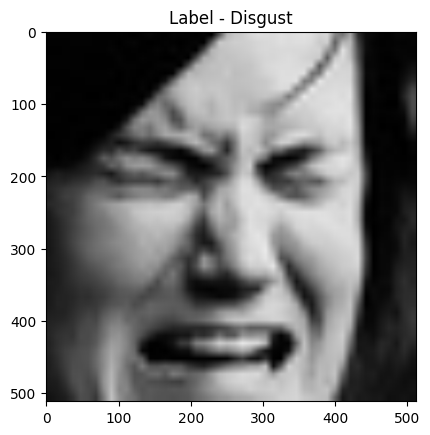

In [ ]:
img, label = view_data[4002]
img = img.permute(1,2,0)
plt.imshow(img)
plt.title(f"Label - {Emotion_labels[label]}")
plt.show()

In [ ]:
from collections import Counter

train_labels = [train_data.targets[i] for i in range(len(train_data))]
val_labels = [val_data.targets[i] for i in range(len(val_data))]

print("Train label counts:", Counter(train_labels))
print("Validation label counts:", Counter(val_labels))

Train label counts: Counter({3: 7164, 4: 4982, 5: 4938, 2: 4103, 0: 3993, 6: 3205, 1: 436})
Validation label counts: Counter({3: 1825, 4: 1216, 5: 1139, 2: 1018, 0: 960, 6: 797, 1: 111})


In [ ]:
# Split the data into train and val set
from torch.utils.data import DataLoader, WeightedRandomSampler
from collections import Counter
import numpy as np

# Step 1: Get label frequencies from train_set
#train_labels = [img_data.targets[i] for i in train_set.indices]
label_counts = Counter(train_labels)

# Step 2: Compute weights for each class
num_classes = len(label_counts)
class_counts = np.array([label_counts[i] for i in range(num_classes)], dtype=np.float32)
class_weights = 1.0 / class_counts

# Step 3: Assign a weight to each sample
sample_weights = [class_weights[label] for label in train_labels]
sample_weights = torch.tensor(sample_weights, dtype=torch.float32)

# Step 4: Create the sampler
sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),
    replacement=True
)

# Step 5: Create the train loader using the sampler
train_loader = DataLoader(
    train_data,
    batch_size=64,
    sampler=sampler
)
val_loader = DataLoader(val_data,batch_size=64,shuffle=True)

In [ ]:
'''from torch.utils.data import Dataset, DataLoader, TensorDataset
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
import numpy as np

train_loader = DataLoader(train_data, batch_size=64, shuffle=False)

#Convert to flat arrays
all_images = []
all_labels = []

for images, labels in tqdm(train_loader):
    # Flatten
    images_np = images.view(images.size(0), -1).numpy()
    all_images.append(images_np)
    all_labels.append(labels.numpy())

X = np.vstack(all_images)
y = np.hstack(all_labels)

print("Original shape:", X.shape, y.shape)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE:", X_resampled.shape, y_resampled.shape)

#  Reshape X back to (N, 3, 48, 48)
X_resampled = X_resampled.reshape(-1, 3, 48, 48)

# 6. Convert to tensors
X_tensor = torch.tensor(X_resampled, dtype=torch.float32)/255
y_tensor = torch.tensor(y_resampled, dtype=torch.long)

# 7. Create a new dataset and DataLoader
smote_dataset = TensorDataset(X_tensor, y_tensor)
smote_loader = DataLoader(smote_dataset, batch_size=64, shuffle=True)'''

100%|██████████| 451/451 [00:14<00:00, 30.35it/s]


Original shape: (28821, 6912) (28821,)
After SMOTE: (50148, 6912) (50148,)


In [ ]:
# Model architecture
from torch import nn
class SEBlock(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super(SEBlock, self).__init__()
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction, in_channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y

class EmotionCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionCNN, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1, inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.1, inplace=True),
            SEBlock(128),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.1, inplace=True),
            SEBlock(256),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.1, inplace=True),
            SEBlock(512),
            nn.AdaptiveAvgPool2d((1, 1)),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.1, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 64),
            nn.LeakyReLU(0.1, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(64,num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [ ]:
import torch.nn.functional as F

class FocalLoss(torch.nn.Module):
    def __init__(self, alpha=1, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        BCE_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return F_loss.mean()

In [ ]:
# Model Training
from torch import optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_em = EmotionCNN()
model_em.to(device)
A = Counter(train_labels)
A = dict(sorted(A.items()))
freq = list(A.values())
class_counts = torch.tensor(freq,dtype=torch.float32)
class_weights = 1.0 / class_counts
class_weights = class_weights / class_weights.sum()
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
#criterion = FocalLoss()
#criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_em.parameters(),lr=0.001)
epochs = 30
#start_time = time.time()
for epoch in range(1,epochs+1):
  model_em.train()
  avg_loss = []
  for x,y in train_loader:
    x = x.to(device)
    y = y.to(device)
    optimizer.zero_grad()
    output = model_em(x)
    loss = criterion(output,y)
    loss.backward()
    optimizer.step()
    avg_loss.append(loss.item())
  print(f"{epoch}: Loss - {sum(avg_loss)/len(avg_loss):.4f}")

1: Loss - 1.2570
2: Loss - 1.0582
3: Loss - 0.9445
4: Loss - 0.8718
5: Loss - 0.8114
6: Loss - 0.7355
7: Loss - 0.6846
8: Loss - 0.6751
9: Loss - 0.6308
10: Loss - 0.6160
11: Loss - 0.5901
12: Loss - 0.5885
13: Loss - 0.5649
14: Loss - 0.5339
15: Loss - 0.5288
16: Loss - 0.5280
17: Loss - 0.5194
18: Loss - 0.5084
19: Loss - 0.5041
20: Loss - 0.4980
21: Loss - 0.5043
22: Loss - 0.4804
23: Loss - 0.4712
24: Loss - 0.4688
25: Loss - 0.4455
26: Loss - 0.4707
27: Loss - 0.4495
28: Loss - 0.4563
29: Loss - 0.4295
30: Loss - 0.4207


In [ ]:
# Model Evaluation
model_em.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for x, y in val_loader:
        x, y = x.to(device), y.to(device)
        outputs = model_em(x)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(y.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred,target_names=list(Emotion_labels.values())))

              precision    recall  f1-score   support

       Angry       0.45      0.35      0.39       960
     Disgust       0.16      0.73      0.26       111
        Fear       0.39      0.25      0.31      1018
       Happy       0.97      0.35      0.51      1825
     Neutral       0.41      0.61      0.49      1216
         Sad       0.41      0.41      0.41      1139
    Surprise       0.46      0.89      0.60       797

    accuracy                           0.46      7066
   macro avg       0.46      0.51      0.43      7066
weighted avg       0.56      0.46      0.45      7066



In [ ]:
!pip install face-alignment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 469.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 993.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

## Training the model with facial feature extraction

In [ ]:
from google.colab import files
upload = files.upload()

Saving shape_predictor_68_face_landmarks.dat to shape_predictor_68_face_landmarks.dat


In [ ]:
import dlib
import cv2
import torch
import numpy as np

# Initialize face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(r"/content/shape_predictor_68_face_landmarks.dat")


def tensor_to_numpy_img(img_tensor):
    # Ensure it's detached from the graph and on CPU
    img_np = img_tensor.detach().cpu().numpy()

    # Convert from (C, H, W) to (H, W) or (H, W, C)
    if img_np.shape[0] == 1:
        img_np = img_np.squeeze(0)  # shape: (H, W)
    else:
        img_np = np.transpose(img_np, (1, 2, 0))  # shape: (H, W, C)

    # Rescale to [0, 255] and convert to uint8
    img_np = (img_np * 255).astype(np.uint8)

    return img_np

def extract_landmarks(image_tensor):
    # Convert tensor to numpy array (assumes BGR image)
    image = tensor_to_numpy_img(image_tensor)
    #gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Detect faces in the image
    faces = detector(image)
    if len(faces) == 0:
        return torch.zeros(136)  # Return zero tensor if no face is detected

    # Take the first detected face (assuming one face per image)
    landmarks = predictor(image, faces[0])

    # Extract 68 landmarks (x, y coordinates)
    landmarks_flat = []
    for i in range(68):
        landmarks_flat.append(landmarks.part(i).x)
        landmarks_flat.append(landmarks.part(i).y)

    # Convert to tensor
    return torch.tensor(landmarks_flat, dtype=torch.float32)


In [ ]:
X_train = []
Y_train = []
for x,y in train_data:
  X_train.append(x)
  Y_train.append(y)

X_val = []
Y_val = []
for x,y in val_data:
  X_val.append(x)
  Y_val.append(y)

In [ ]:
X_landmark_train = torch.stack([extract_landmarks(img) for img in X_train])
X_landmark_val = torch.stack([extract_landmarks(img) for img in X_val])

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
X_train = torch.stack(X_train)
Y_train = torch.tensor(Y_train)
X_val = torch.stack(X_val)
Y_val = torch.tensor(Y_val)
#train_dataset = TensorDataset(X_train,X_landmark_train,Y_train)
val_dataset = TensorDataset(X_val,X_landmark_val,Y_val)

#train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
val_loader = DataLoader(val_dataset,batch_size=64,shuffle=True)

In [ ]:
import torch
import torch.nn as nn

class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(channels, channels // reduction),
            nn.ReLU(inplace=True),
            nn.Linear(channels // reduction, channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        weights = self.fc(x).unsqueeze(-1).unsqueeze(-1)
        return x * weights

class EmotionModelWithLandmarks(nn.Module):
    def __init__(self, num_classes=7, num_landmarks=136):
        super(EmotionModelWithLandmarks, self).__init__()

        # CNN for image feature extraction
        self.image_features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.01,inplace=True),
            SEBlock(64),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.01,inplace=True),
            SEBlock(128),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.01,inplace=True),
            SEBlock(256),
            nn.AdaptiveAvgPool2d((1, 1)),  # output (N, 256, 1, 1)
        )

        self.flatten = nn.Flatten()  # output (N, 256)

        # Landmark feature processing
        self.landmark_features = nn.Sequential(
            nn.Linear(num_landmarks, 128),
            nn.LeakyReLU(0.01,inplace=True),
            nn.Dropout(0.2),
        )

        # Final classifier (after concatenating both features)
        self.classifier = nn.Sequential(
            nn.Linear(256 + 128, 128),  # 256 from image + 128 from landmarks
            nn.LeakyReLU(0.01,inplace=True),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, image, landmarks):
        img_feat = self.image_features(image)
        img_feat = self.flatten(img_feat)  # (N, 256)

        landmark_feat = self.landmark_features(landmarks)  # (N, 128)

        combined = torch.cat((img_feat, landmark_feat), dim=1)  # (N, 384)

        output = self.classifier(combined)
        return output

In [ ]:
import torch
from imblearn.over_sampling import SMOTE
import numpy as np

# Convert tensors to numpy arrays for SMOTE
X_train_flattened = X_train.view(X_train.size(0), -1).numpy()  # Flattening image tensors
X_landmark_train = X_landmark_train.numpy()  # Convert landmarks to numpy

# Apply SMOTE on both image data and landmark data
smote = SMOTE(sampling_strategy='auto', random_state=42)

# SMOTE for image data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_flattened, Y_train.numpy())

# SMOTE for landmark data
X_landmark_train_resampled, _ = smote.fit_resample(X_landmark_train, Y_train.numpy())

# Convert back to tensors
X_train_resampled = torch.tensor(X_train_resampled, dtype=torch.float32)
X_landmark_train_resampled = torch.tensor(X_landmark_train_resampled, dtype=torch.float32)
Y_train_resampled = torch.tensor(Y_train_resampled, dtype=torch.long)

# Reshape the image data back to original shape (3, 48, 48)
X_train_resampled = X_train_resampled.view(X_train_resampled.size(0), 3, 48, 48)

# Create a new dataset with the resampled data
train_dataset = TensorDataset(X_train_resampled, X_landmark_train_resampled, Y_train_resampled)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


In [ ]:
# Model Training
from torch import optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_em = EmotionModelWithLandmarks()
model_em.to(device)
'''A = Counter(train_labels)
A = dict(sorted(A.items()))
freq = list(A.values())
class_counts = torch.tensor(freq,dtype=torch.float32)
class_weights = 1.0 / class_counts
class_weights = class_weights / class_weights.sum()
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))'''
criterion = FocalLoss()
#criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_em.parameters(),lr=0.01)
epochs = 30
#start_time = time.time()
for epoch in range(1,epochs+1):
  model_em.train()
  avg_loss = []
  for images, landmarks, labels in train_loader:
    images = images.to(device)
    landmarks = landmarks.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model_em(images, landmarks)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    avg_loss.append(loss.item())
  print(f"{epoch}: Loss - {sum(avg_loss)/len(avg_loss):.4f}")

1: Loss - 1.2919
2: Loss - 0.9826
3: Loss - 0.8103
4: Loss - 0.6968
5: Loss - 0.6195
6: Loss - 0.5618
7: Loss - 0.5122
8: Loss - 0.4740
9: Loss - 0.4252
10: Loss - 0.3855
11: Loss - 0.3530
12: Loss - 0.3130
13: Loss - 0.2852
14: Loss - 0.2514
15: Loss - 0.2256
16: Loss - 0.2069
17: Loss - 0.1875
18: Loss - 0.1715
19: Loss - 0.1567
20: Loss - 0.1400
21: Loss - 0.1354
22: Loss - 0.1235
23: Loss - 0.1153
24: Loss - 0.1088
25: Loss - 0.1063
26: Loss - 0.0966
27: Loss - 0.0960
28: Loss - 0.0846
29: Loss - 0.0868
30: Loss - 0.0837


In [ ]:
model_em.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, landmarks, labels in val_loader:
        images, landmarks, labels = images.to(device), landmarks.to(device), labels.to(device)
        outputs = model_em(images,landmarks)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred,target_names=list(Emotion_labels.values())))

              precision    recall  f1-score   support

       Angry       0.36      0.46      0.40       960
     Disgust       0.50      0.14      0.22       111
        Fear       0.38      0.43      0.40      1018
       Happy       0.71      0.77      0.74      1825
     Neutral       0.50      0.40      0.45      1216
         Sad       0.39      0.36      0.37      1139
    Surprise       0.74      0.60      0.66       797

    accuracy                           0.52      7066
   macro avg       0.51      0.45      0.46      7066
weighted avg       0.53      0.52      0.52      7066



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy",accuracy_score(y_true,y_pred))
print("Precision",precision_score(y_true,y_pred,average='micro'))
print("Recall",recall_score(y_true,y_pred,average='micro'))
print("F1",f1_score(y_true,y_pred,average='micro'))

Accuracy 0.5200962354939145
Precision 0.5200962354939145
Recall 0.5200962354939145
F1 0.5200962354939145


In [ ]:
torch.save(model_em.state_dict(),"Emotion_Recognition.pth")

In [ ]:
model_em

EmotionModelWithLandmarks(
  (image_features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): SEBlock(
      (fc): Sequential(
        (0): AdaptiveAvgPool2d(output_size=1)
        (1): Flatten(start_dim=1, end_dim=-1)
        (2): Linear(in_features=64, out_features=4, bias=True)
        (3): ReLU(inplace=True)
        (4): Linear(in_features=4, out_features=64, bias=True)
        (5): Sigmoid()
      )
    )
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.01, inplace=True)
    (8): SEBlock(
      (fc): Sequential(
        (0): AdaptiveAvgPool2d(output_size=1)
   

# Streamlit part

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 129.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.5 MB/s eta 0:00:00


In [ ]:
%%writefile Emotion_Recognition_detect.py
import torch
import torch.nn as nn
import streamlit as st
from torchvision.datasets import ImageFolder
from torchvision import transforms
import matplotlib.pyplot as plt
import dlib
import numpy as np
from PIL import Image
import time

st.title(":blue[FACIAL EMOTION RECOGNITION]")

Emotion_labels = {
    0:"Angry",
    1:"Disgust",
    2:"Fear",
    3:"Happy",
    4:"Neutral",
    5:"Sad",
    6:"Surprise"
}

view_transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
])

img_transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
])

# Initialize face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(r"/content/shape_predictor_68_face_landmarks.dat")


def extract_landmarks(pil_image):
    # Convert PIL to numpy array (RGB)
    image = np.array(pil_image)

    # Detect faces
    faces = detector(image)
    if len(faces) == 0:
        return torch.zeros(136)  # No face detected

    # Extract landmarks from first face
    landmarks = predictor(image, faces[0])
    landmarks_flat = []
    for i in range(68):
        landmarks_flat.append(landmarks.part(i).x)
        landmarks_flat.append(landmarks.part(i).y)

    return torch.tensor(landmarks_flat, dtype=torch.float32)



class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(channels, channels // reduction),
            nn.ReLU(inplace=True),
            nn.Linear(channels // reduction, channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        weights = self.fc(x).unsqueeze(-1).unsqueeze(-1)
        return x * weights

class EmotionModelWithLandmarks(nn.Module):
    def __init__(self, num_classes=7, num_landmarks=136):
        super(EmotionModelWithLandmarks, self).__init__()

        # CNN for image feature extraction
        self.image_features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.01,inplace=True),
            SEBlock(64),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.01,inplace=True),
            SEBlock(128),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.01,inplace=True),
            SEBlock(256),
            nn.AdaptiveAvgPool2d((1, 1)),  # output (N, 256, 1, 1)
        )

        self.flatten = nn.Flatten()  # output (N, 256)

        # Landmark feature processing
        self.landmark_features = nn.Sequential(
            nn.Linear(num_landmarks, 128),
            nn.LeakyReLU(0.01,inplace=True),
            nn.Dropout(0.2),
        )

        # Final classifier (after concatenating both features)
        self.classifier = nn.Sequential(
            nn.Linear(256 + 128, 128),  # 256 from image + 128 from landmarks
            nn.LeakyReLU(0.01,inplace=True),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, image, landmarks):
        img_feat = self.image_features(image)
        img_feat = self.flatten(img_feat)  # (N, 256)

        landmark_feat = self.landmark_features(landmarks)  # (N, 128)

        combined = torch.cat((img_feat, landmark_feat), dim=1)  # (N, 384)

        output = self.classifier(combined)
        return output

em_detect = EmotionModelWithLandmarks()
em_detect.load_state_dict(torch.load(r"/content/Emotion_Recognition.pth", map_location='cpu'))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
em_detect.to(device)
image_em = st.file_uploader("Upload the image",type=["jpg", "jpeg", "png"])
if image_em is not None:
  if st.button('Display Image and Detect Emotion'):
    image_show = Image.open(image_em).convert("RGB")
    image_show = view_transform(image_show)
    fig, ax = plt.subplots()
    image_show = image_show.permute(1,2,0)
    ax.imshow(image_show)
    ax.axis('off')
    st.pyplot(fig)
    em_detect.eval()
    image_emo = Image.open(image_em).convert("RGB")
    image_ev = img_transform(image_emo)
    image_ev = image_ev.unsqueeze(0)
    landmark_ev = extract_landmarks(image_emo)
    landmark_ev = landmark_ev.unsqueeze(0)
    image_ev = image_ev.to(device)
    landmark_ev = landmark_ev.to(device)
    with torch.no_grad():
      emotion_out = em_detect(image_ev,landmark_ev)
      emotion_pred = torch.argmax(emotion_out,dim=1)
      Predicted_em = emotion_pred.cpu().numpy()
    time.sleep(4)
    st.write("Emotion - ",Emotion_labels[Predicted_em[0]])

Overwriting Emotion_Recognition_detect.py


In [ ]:
!npm install localtunnel

⠙⠹⠸⠼
up to date, audited 23 packages in 584ms
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠼
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠼

In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.16.253.204


In [ ]:
!streamlit run /content/Emotion_Recognition_detect.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

⠙your url is: https://chilly-seals-cover.loca.lt
^C
